# Introduction

In this notebook, we perform exploration on the 2023 NSDUH data with the goals of: 

1) Learning more about the demographic characteristics of multiracial young adults aged 18-25 
2) Learning more about the substance use and mental health patterns among multiracial young adults
3) Examining initial associations between illicit substance use and mental health

To accomplish goal 1, we create bar plots that reveal frequencies of demographics among multiracial young adults such as income, household composition, and education. 

To accomplish goal 2, we create histograms/boxplots and bar plots to examine substance use and mental health patterns respectively.

To accomplish goal 3, we do a combination of bar plots/boxplots with variability measures and inferential statistics to capture initial associations between illicit substance use and mental health outcomes.

By learning more about the demographic characteristics of multiracial young adults, we gain an important understanding of potential mediators towards the relationship between substance use and mental health when it comes time to do our main analysis. For example, if we learn that multiracial young adults are generally from households with lower median income, it would make sense if there is a strong association between illicit substance use and mental health outcomes because multiracial young adults from areas of lower median household income are more likely to experience more stress.

By learning more about substance use and mental health patterns among multiracial young adults, we can gain an initial understanding on why multiracial young adults is an important population to be studied in health-related research: their tendency to experience more substance use and mental health issues (as outlined in the 2023 NSDUH national report). 

By examining initial associations between illicit substance use and mental health, we can gain an initial understanding on how illicit substance use is associated with mental health outcomes among multiracial young adults, motivating us to dive deeper into areas where there is a clear association shown between illicit substance use and mental health.

In [40]:
#Import modules
import os #file path
import pandas as pd #Access, modify, and manipulate data
import matplotlib.pyplot as plt #Data visualization
import seaborn as sns #Data visualization 
import numpy as np #Numerical computations
from samplics.categorical import Tabulation #Survey design
from samplics.utils.types import PopParam #Survey design 
#Base path to GitHub repository
path="C:/Users/John Platt/OneDrive/DA301Project/John-Platt-DA-401-Project"
#Directory where the project data is
datadir="data"

In [2]:
#Read in the cleaned 2023 NSDUH dataset
nsduh_2023 = pd.read_csv(os.path.join(path, datadir, "NSDUH_2023.csv"))

In [3]:
#Delete first column of the data that has the row numbers (starts at 1)
nsduh_2023.drop('Unnamed: 0', axis=1, inplace=True) 
#Print out the dataset
nsduh_2023

,ANALWT2_C,VESTR_C,VEREP,IRSEX,CATAGE,NEWRACE2,EDUHIGHCAT,IRWRKSTAT18,IRHHSIZ2,IRPRVHLT,...,IRNICVAP30N,IRHALLUCYFQ,IRALCBNG30D,SUTINPPY,IRDSTNRV12,IRDSTEFF12,IRIMPCONCN,IRSUICTHNK,IRAMDEYR,MHTINPPY
0,3276.469874,40031,2,Male,4,7,Some coll/Assoc Dg,Other (incl. not in labor force),Three people in household,Yes,...,0.0,0,7,No,LEGITIMATE SKIP,LEGITIMATE SKIP,LEGITIMATE SKIP,No,No,No
1,15630.082955,40021,2,Male,4,1,High school grad,Employed full time,Three people in household,No,...,0.0,0,5,No,Some of the time,Most of the time,Mild difficultly,No,No,No
2,4018.172390,40043,1,Female,4,4,High school grad,Other (incl. not in labor force),Three people in household,No,...,0.0,0,0,No,LEGITIMATE SKIP,LEGITIMATE SKIP,Mild difficultly,No,Yes,No
3,10711.709540,40030,2,Male,1,7,12 to 17 year olds,12-17 year olds,Five people in household,No,...,0.0,0,0,No,LEGITIMATE SKIP,LEGITIMATE SKIP,LEGITIMATE SKIP,NaN,NaN,No
4,8195.104779,40023,2,Male,4,6,College graduate,Employed full time,Three people in household,Yes,...,0.0,0,0,No,LEGITIMATE SKIP,LEGITIMATE SKIP,LEGITIMATE SKIP,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56700,417.630119,40018,2,Female,4,7,Less high school,Employed part time,Four people in household,No,...,0.0,0,0,No,LEGITIMATE SKIP,LEGITIMATE SKIP,LEGITIMATE SKIP,No,No,No
56701,7625.717934,40017,1,Female,4,1,Some coll/Assoc Dg,Other (incl. not in labor force),Four people in household,Yes,...,0.0,0,0,No,Most of the time,None of the time,No difficulty,No,No,No
56702,23556.083908,40042,1,Female,4,1,College graduate,Employed full time,One person in household,Yes,...,0.0,3,5,No,LEGITIMATE SKIP,LEGITIMATE SKIP,LEGITIMATE SKIP,No,No,No
56703,5193.882625,40040,2,Male,4,5,College graduate,Other (incl. not in labor force),Two people in household,No,...,0.0,0,0,No,LEGITIMATE SKIP,LEGITIMATE SKIP,No difficulty,No,No,No


In [ ]:
def rel_freq_barplot(df,xvar,xlabel,xaxisrotation,title):
    '''
    Given a dataframe, creates barplot for relative frequencies of one variable
    
    Parameters:
    df - object - Cleaned 2023 NSDUH dataframe
    xvar - string - The variable that will be the x-axis of our barplot (variable that we will show counts of)
    xlabel - string - The x-axis label of our barplot
    xaxisrotation - integer - How much we should rotate the x-axis tick labels (0 to 360 degrees)
    title - string - The title of our barplot

    Return:
    None. The output of this function is the barplot being displayed.
    '''
    #Only include rows of the data corresponding to multiracial young adults aged 18-25
    mask = (nsduh_2023["CATAGE"] == 2) & (nsduh_2023["NEWRACE2"] == 6)
    sub = nsduh_2023.loc[mask].copy()
    #Tabulation function calculates and tabulates summary statistics of a categorical variable given
    #survey weights and survey design measures
    tab = Tabulation(PopParam.prop)  
    tab.tabulate(
    vars=sub[[xvar]], #Gender variable of 2023 NSDUH data on multiracial young adults         
    samp_weight=sub["ANALWT2_C"], #Weights variable of 2023 NSDUH data on multiracial young adults 
    stratum=sub["VESTR_C"], #Stratum variance variable of 2023 NSDUH data on multiracial young adults 
    psu=sub["VEREP"], #Primary sampling unit variable of 2023 NSDUH data on multiracial young adults
    remove_nan=True
)
    #Convert the weighted frequency estimates to a dataframe
    df=tab.to_dataframe()
    #Sort the frequency dataframe by frequencies in descending order
    df.sort_values(by=PopParam.prop,ascending=False,inplace=True)
    #Create percentage column
    df['Percentage']=df[PopParam.prop]*100
    #Create column that has the lower bound of 95% CI expressed as a percentage
    df['Lower_ci_percentage']=df["lower_ci"]*100
    #Create column that has the upper bound of 95% CI expressed as a percentage
    df['Upper_ci_percentage']=df["upper_ci"]*100
    #Create new column that calculates the lower error based on the percentage subtracted to the Lower_ci_percentage
    df['lower_error']=df["Percentage"]-df['Lower_ci_percentage']
    #Create new column that calculates the upper error based on the percentage subtracted to the Upper_ci_percentage
    df['upper_error']=df['Upper_ci_percentage']-df["Percentage"]
    #Put lower and upper measures into a list
    asymmetric_err=[df['lower_error'],df['upper_error']]
    #Create bar plot with error bars
    plot=plt.bar(df['category'],df['Percentage'], yerr=asymmetric_err, capsize=5, color=sns.color_palette('Spectral'))
    #Add data labels to bar plot
    plt.bar_label(plot,fmt="%.2f",label_type='center')
    #Change x-axis label of plot
    plt.xlabel(xlabel)
    #Change y-axis label of plot
    plt.ylabel("Weighted Proportion (%)")
    #Change title of plot
    plt.title(title)
    #Change rotation angle of x-axis tick labels of plot
    plt.xticks(rotation=xaxisrotation)
    #Show plot
    plt.show()

# Understanding Our Sample

In section, we accomplish goal 1 outlined in the introduction. 

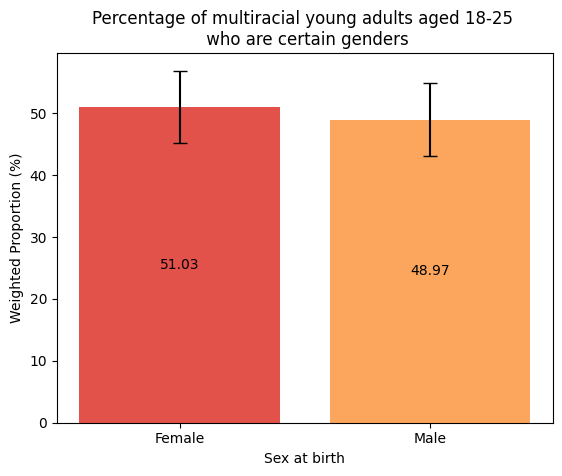

In [88]:
#Examine gender frequencies among multiracial young adults aged 18-25
rel_freq_barplot(nsduh_2023,'IRSEX','Sex at birth',0,"Percentage of multiracial young adults aged 18-25 \n who are certain genders")

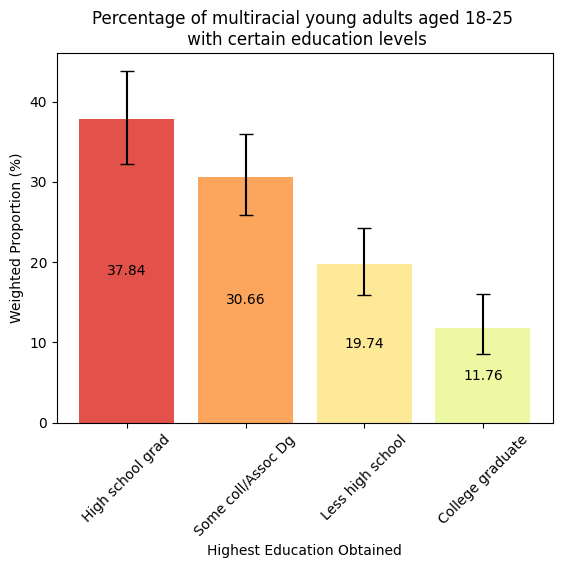

In [89]:
#Examine education frequencies among multiracial young adults aged 18-25
rel_freq_barplot(nsduh_2023,'EDUHIGHCAT','Highest Education Obtained',45,"Percentage of multiracial young adults aged 18-25 \n with certain education levels")


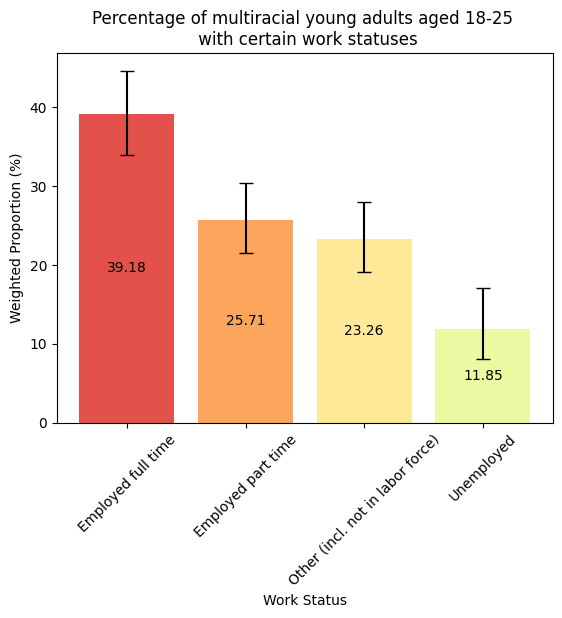

In [90]:
#Examine work status among multiracial young adults aged 18-25
rel_freq_barplot(nsduh_2023,'IRWRKSTAT18','Work Status',45,"Percentage of multiracial young adults aged 18-25 \n with certain work statuses")

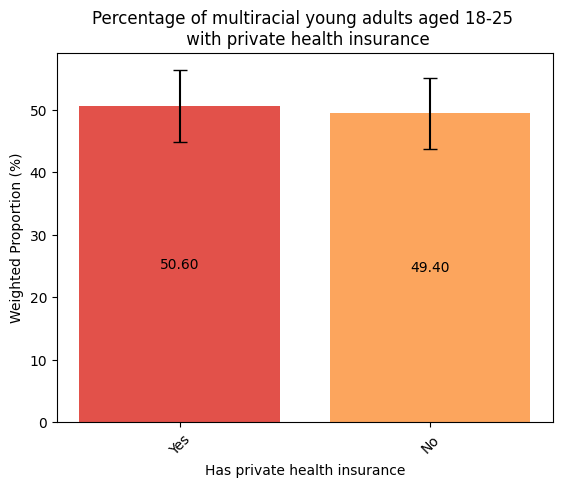

In [91]:
#Examine private health insurance frequencies among multiracial young adults aged 18-25
rel_freq_barplot(nsduh_2023,'IRPRVHLT','Has private health insurance',45,"Percentage of multiracial young adults aged 18-25 \n with private health insurance")

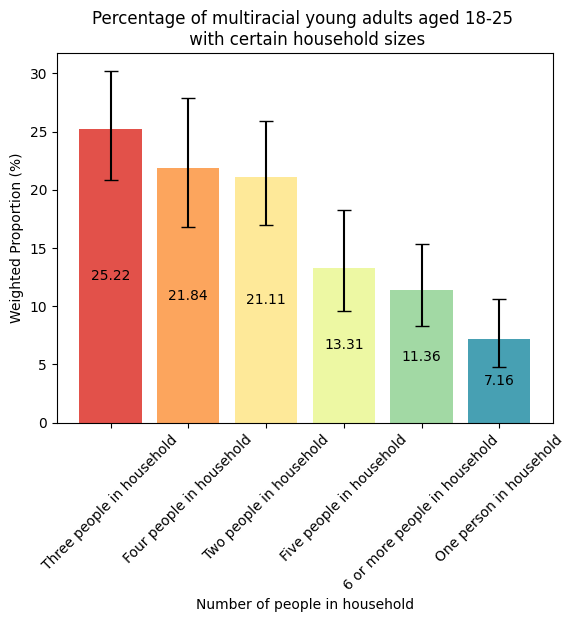

In [92]:
#Examine household size frequencies among multiracial young adults aged 18-25
rel_freq_barplot(nsduh_2023,'IRHHSIZ2','Number of people in household',45,"Percentage of multiracial young adults aged 18-25 \n with certain household sizes")

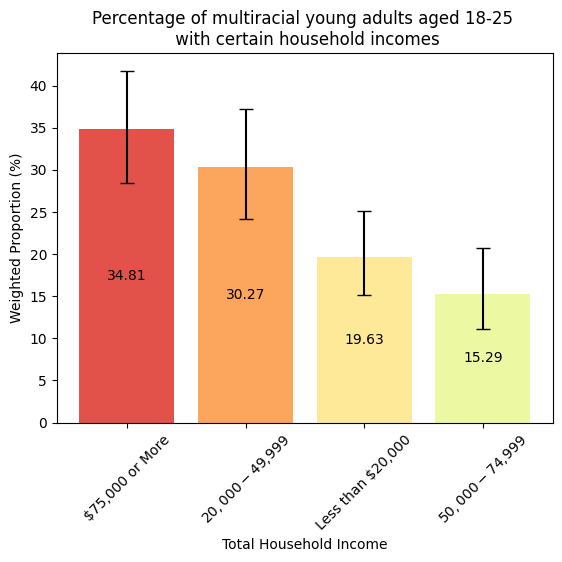

In [93]:
#Examine income frequencies among multiracial young adults aged 18-25
rel_freq_barplot(nsduh_2023,'INCOME','Total Household Income',45,"Percentage of multiracial young adults aged 18-25 \n with certain household incomes")

# Examining Substance Use and Mental Health Patterns